In [1033]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [1034]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1035]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [1036]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627913 entries, 0 to 1627912
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1627913 non-null  int64  
 1   kWh       1627913 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.8 MB


In [1037]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1627908    2.38
1627909    2.39
1627910    2.37
1627911    2.38
1627912    2.37
Name: kWh, Length: 1627913, dtype: float64

In [1038]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1627908    2.38
1627909    2.39
1627910    2.37
1627911    2.38
1627912    2.37
Name: kWh, Length: 1627913, dtype: float64

In [1039]:
l=len(conso_data)-1
l

1627912

In [1040]:
conso_data['sec']=conso_data['Interval']/1000


In [1041]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1042]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1043]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627913 entries, 0 to 1627912
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1627913 non-null  int64  
 1   kWh        1627913 non-null  float64
 2   sec        1627913 non-null  float64
 3   Wh         1627913 non-null  float64
 4   cumul(ms)  1627913 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 62.1 MB


In [1044]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1627908,1515,2.38,1.515,2376.237624,40232083284
1627909,1508,2.39,1.508,2387.267905,40232084792
1627910,1517,2.37,1.517,2373.104812,40232086309
1627911,1512,2.38,1.512,2380.952381,40232087821
1627912,1516,2.37,1.516,2374.670185,40232089337


In [1045]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

40232089337000

In [1046]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 14, 4, 15430)

In [1047]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1048]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [1049]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [1050]:
conso_data['dates']

0         2023-08-21 19:14:25.949430
1         2023-08-21 19:14:47.807430
2         2023-08-21 19:15:09.808430
3         2023-08-21 19:15:31.736430
4         2023-08-21 19:15:53.627430
                     ...            
1627908   2024-11-29 10:48:47.299430
1627909   2024-11-29 10:48:48.807430
1627910   2024-11-29 10:48:50.324430
1627911   2024-11-29 10:48:51.836430
1627912   2024-11-29 10:48:53.352430
Name: dates, Length: 1627913, dtype: datetime64[ns]

## créer les dates

In [1051]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:25.949430,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:14:47.807430,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:09.808430,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:31.736430,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:53.627430,21/08/23
...,...,...,...,...,...,...,...
1627908,1515,2.38,1.515,2376.237624,40232083284,2024-11-29 10:48:47.299430,29/11/24
1627909,1508,2.39,1.508,2387.267905,40232084792,2024-11-29 10:48:48.807430,29/11/24
1627910,1517,2.37,1.517,2373.104812,40232086309,2024-11-29 10:48:50.324430,29/11/24
1627911,1512,2.38,1.512,2380.952381,40232087821,2024-11-29 10:48:51.836430,29/11/24


### save conso_data with dates

In [1052]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [1053]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('29/11/24', 29, 11, 2024)

In [1054]:
here = now.strftime('%H:%M:%S')
here

'10:49:28'

In [1055]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1056]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 1626119 to 1627912
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1794 non-null   int64         
 1   kWh        1794 non-null   float64       
 2   sec        1794 non-null   float64       
 3   Wh         1794 non-null   float64       
 4   cumul(ms)  1794 non-null   int64         
 5   dates      1794 non-null   datetime64[ns]
 6   days       1794 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 112.1+ KB


In [1057]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [1058]:
data = list(df_grp['kWh'])
print(data)

[0.818, 3.7, 4.229, 3.675, 4.189, 4.601, 3.53, 3.418, 3.513, 3.69, 3.754, 3.813, 4.25, 3.79, 3.486, 3.635, 3.32, 3.383, 4.278, 4.009, 4.043, 3.931, 3.447, 4.444, 3.756, 3.759, 4.329, 4.704, 3.82, 3.224, 3.179, 3.988, 3.683, 3.157, 3.802, 4.127, 3.767, 3.579, 4.77, 4.196, 4.538, 3.776, 3.409, 4.305, 3.879, 3.857, 3.441, 4.08, 3.657, 3.399, 4.136, 3.385, 3.883, 3.835, 3.637, 3.759, 4.246, 3.299, 3.875, 2.987, 2.055, 2.041, 2.447, 4.089, 3.719, 4.331, 3.612, 3.927, 3.742, 3.903, 4.003, 4.105, 3.656, 3.154, 3.805, 3.508, 3.626, 3.709, 3.684, 3.242, 3.861, 3.252, 3.795, 3.612, 4.078, 3.564, 3.385, 3.818, 4.065, 4.328, 4.136, 3.998, 4.235, 3.742, 3.929, 3.86, 3.915, 3.737, 4.05, 4.346, 3.885, 3.506, 3.682, 3.668, 3.347, 3.847, 4.0, 4.1, 3.477, 4.175, 3.604, 4.062, 4.545, 3.679, 3.435, 3.58, 4.153, 3.702, 4.088, 3.98, 3.746, 3.591, 5.126, 3.702, 3.766, 4.287, 4.107, 4.698, 4.407, 3.994, 3.767, 4.353, 4.693, 4.194, 4.792, 4.315, 3.732, 4.17, 3.701, 3.653, 3.532, 3.935, 3.681, 3.785, 3.58, 3.48

In [1059]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1060]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1061]:
df = conso_data
len(df)

1627913

In [1062]:
period(p=2)

2023-08-22 01:20:39.752430	2023-08-22 08:24:55.372430	7h 4m 15s 	2000


In [1063]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.293667
dtype: float64

In [1064]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.485895
dtype: float64

In [1065]:
last=df_grp.iloc[-1]['kWh']
last

1.794

In [1066]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 1626119 to 1627912
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1794 non-null   int64         
 1   kWh        1794 non-null   float64       
 2   sec        1794 non-null   float64       
 3   Wh         1794 non-null   float64       
 4   cumul(ms)  1794 non-null   int64         
 5   dates      1794 non-null   datetime64[ns]
 6   days       1794 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 112.1+ KB


In [1067]:
# select day
day = today
#day = '16/08/24'


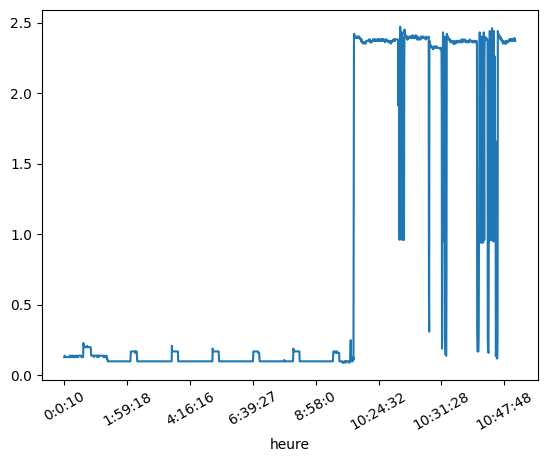

In [1068]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1069]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:25.949430,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:14:47.807430,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:09.808430,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:31.736430,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:53.627430,21/08/23
...,...,...,...,...,...,...,...
1627908,1515,2.38,1.515,2376.237624,40232083284,2024-11-29 10:48:47.299430,29/11/24
1627909,1508,2.39,1.508,2387.267905,40232084792,2024-11-29 10:48:48.807430,29/11/24
1627910,1517,2.37,1.517,2373.104812,40232086309,2024-11-29 10:48:50.324430,29/11/24
1627911,1512,2.38,1.512,2380.952381,40232087821,2024-11-29 10:48:51.836430,29/11/24


In [1070]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:10,27369,0.13,27.369,131.535679,40193166851,2024-11-29 00:00:10.866430,29/11/24
0:0:36,25829,0.14,25.829,139.378218,40193192680,2024-11-29 00:00:36.695430,29/11/24
0:1:3,26424,0.14,26.424,136.239782,40193219104,2024-11-29 00:01:03.119430,29/11/24
0:1:30,27035,0.13,27.035,133.160718,40193246139,2024-11-29 00:01:30.154430,29/11/24
0:1:57,27062,0.13,27.062,133.027862,40193273201,2024-11-29 00:01:57.216430,29/11/24
...,...,...,...,...,...,...,...
10:48:47,1515,2.38,1.515,2376.237624,40232083284,2024-11-29 10:48:47.299430,29/11/24
10:48:48,1508,2.39,1.508,2387.267905,40232084792,2024-11-29 10:48:48.807430,29/11/24
10:48:50,1517,2.37,1.517,2373.104812,40232086309,2024-11-29 10:48:50.324430,29/11/24


In [1071]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.567
Min : 18/11/24 3.156


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1626119,27369,0.13,27.369,131.535679,40193166851,2024-11-29 00:00:10.866430,29/11/24,0:0:10
1626120,25829,0.14,25.829,139.378218,40193192680,2024-11-29 00:00:36.695430,29/11/24,0:0:36
1626121,26424,0.14,26.424,136.239782,40193219104,2024-11-29 00:01:03.119430,29/11/24,0:1:3
1626122,27035,0.13,27.035,133.160718,40193246139,2024-11-29 00:01:30.154430,29/11/24,0:1:30
1626123,27062,0.13,27.062,133.027862,40193273201,2024-11-29 00:01:57.216430,29/11/24,0:1:57
...,...,...,...,...,...,...,...,...
1627908,1515,2.38,1.515,2376.237624,40232083284,2024-11-29 10:48:47.299430,29/11/24,10:48:47
1627909,1508,2.39,1.508,2387.267905,40232084792,2024-11-29 10:48:48.807430,29/11/24,10:48:48
1627910,1517,2.37,1.517,2373.104812,40232086309,2024-11-29 10:48:50.324430,29/11/24,10:48:50
1627911,1512,2.38,1.512,2380.952381,40232087821,2024-11-29 10:48:51.836430,29/11/24,10:48:51


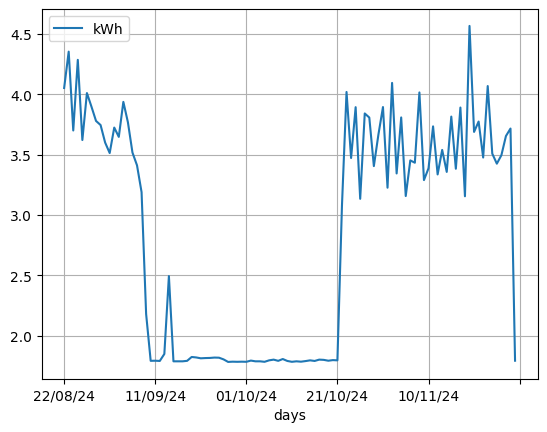

In [1072]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-29 00:00:10.866430	2024-11-29 08:57:22.861430	8h 57m 11s 	1000
2024-11-29 08:57:22.861430	2024-11-29 10:48:53.352430	1h 51m 30s 	794
<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 1626119 to 1627912
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1794 non-null   int64         
 1   kWh        1794 non-null   float64       
 2   sec        1794 non-null   float64       
 3   Wh         1794 non-null   float64       
 4   cumul(ms)  1794 non-null   int64         
 5   dates      1794 non-null   datetime64[ns]
 6   days       1794 non-null   object        
 7   heure      1794 non-null   object        
 8   hours      1794 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 140.2+ KB


('29/11/24', <Axes: xlabel='hours'>)

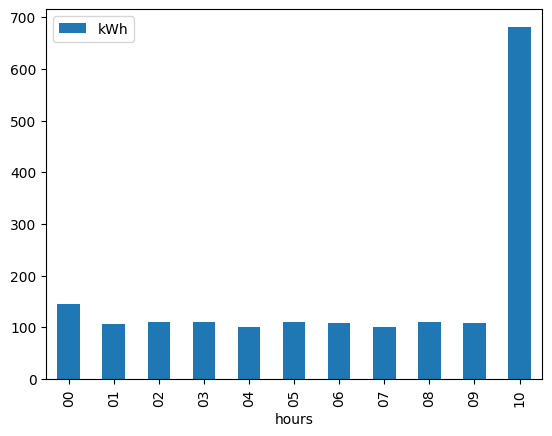

In [1073]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1074]:
df_grp

,kWh
days,
21/08/23,0.818
22/08/23,3.700
23/08/23,4.229
24/08/23,3.675
25/08/23,4.189
...,...
25/11/24,3.426
26/11/24,3.496
27/11/24,3.655


In [1075]:
# select number of days to display
span = 30
#df_grp.tail(span)


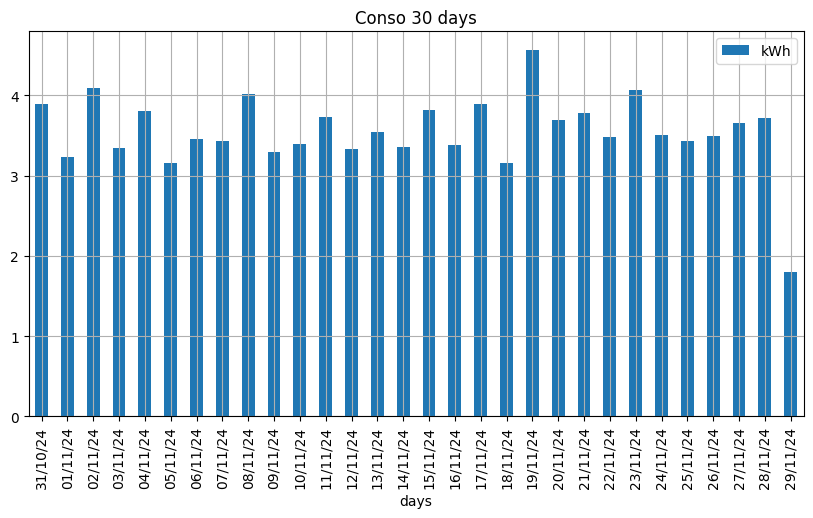

In [1076]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


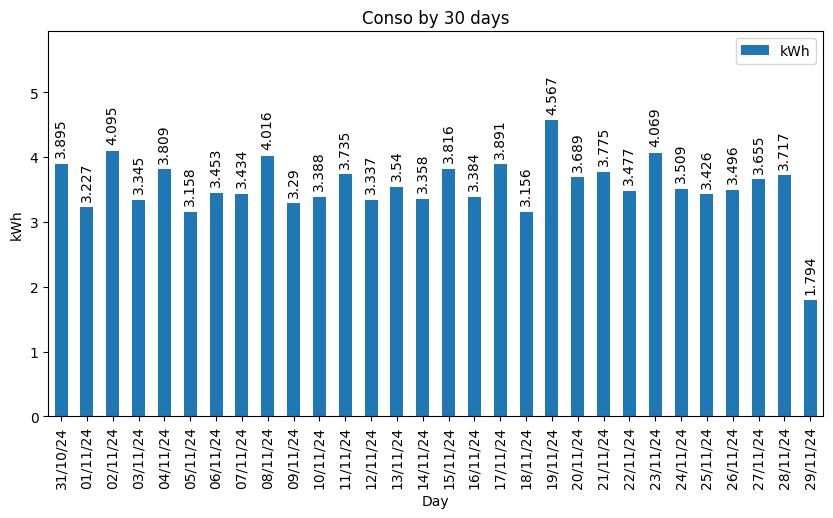

In [1077]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1078]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
31/10/24    3.895
01/11/24    3.227
02/11/24    4.095
03/11/24    3.345
04/11/24    3.809
05/11/24    3.158
06/11/24    3.453
07/11/24    3.434
08/11/24    4.016
09/11/24    3.290
10/11/24    3.388
11/11/24    3.735
12/11/24    3.337
13/11/24    3.540
14/11/24    3.358
15/11/24    3.816
16/11/24    3.384
17/11/24    3.891
18/11/24    3.156
19/11/24    4.567
20/11/24    3.689
21/11/24    3.775
22/11/24    3.477
23/11/24    4.069
24/11/24    3.509
25/11/24    3.426
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    1.794
Name: kWh, dtype: float64

In [1079]:
x_labels=df_grp.tail(span).index
x_labels

Index(['31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24', '05/11/24',
       '06/11/24', '07/11/24', '08/11/24', '09/11/24', '10/11/24', '11/11/24',
       '12/11/24', '13/11/24', '14/11/24', '15/11/24', '16/11/24', '17/11/24',
       '18/11/24', '19/11/24', '20/11/24', '21/11/24', '22/11/24', '23/11/24',
       '24/11/24', '25/11/24', '26/11/24', '27/11/24', '28/11/24', '29/11/24'],
      dtype='object', name='days')

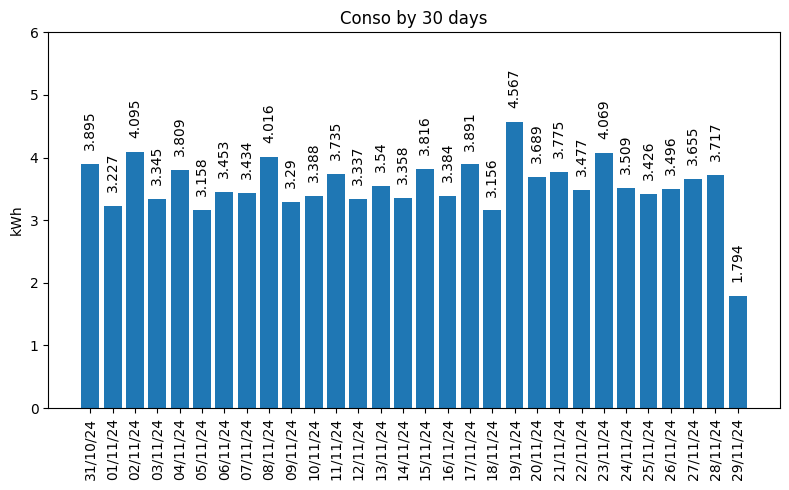

In [1080]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1081]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

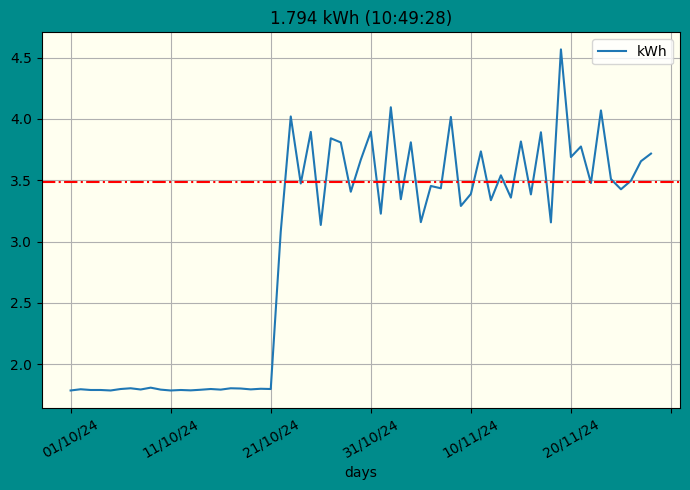

In [1082]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

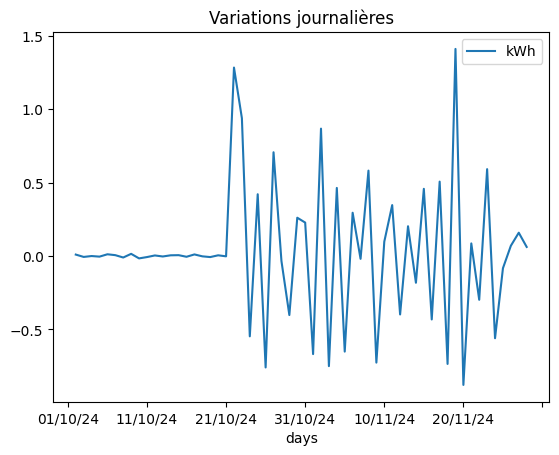

In [1083]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1084]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:25.949430,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:14:47.807430,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:09.808430,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:31.736430,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:53.627430,21/08/23,19
...,...,...,...,...,...,...,...,...
1627908,1515,2.38,1.515,2376.237624,40232083284,2024-11-29 10:48:47.299430,29/11/24,10
1627909,1508,2.39,1.508,2387.267905,40232084792,2024-11-29 10:48:48.807430,29/11/24,10
1627910,1517,2.37,1.517,2373.104812,40232086309,2024-11-29 10:48:50.324430,29/11/24,10
1627911,1512,2.38,1.512,2380.952381,40232087821,2024-11-29 10:48:51.836430,29/11/24,10


In [1085]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [1086]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [1087]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [1088]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1089]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,818
22/08/23,3700
23/08/23,4229
24/08/23,3675
25/08/23,4189
...,...
25/11/24,3426
26/11/24,3496
27/11/24,3655


In [1090]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:25.949430,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:14:47.807430,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:09.808430,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:31.736430,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:53.627430,21/08/23,19
...,...,...,...,...,...,...,...,...
1627908,1515,2.38,1.515,2376.237624,40232083284,2024-11-29 10:48:47.299430,29/11/24,10
1627909,1508,2.39,1.508,2387.267905,40232084792,2024-11-29 10:48:48.807430,29/11/24,10
1627910,1517,2.37,1.517,2373.104812,40232086309,2024-11-29 10:48:50.324430,29/11/24,10
1627911,1512,2.38,1.512,2380.952381,40232087821,2024-11-29 10:48:51.836430,29/11/24,10


In [1091]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
29/11/24 10    1627908  29/11/24    10  2.38
               1627909  29/11/24    10  2.39
               1627910  29/11/24    10  2.37
               1627911  29/11/24    10  2.38
               1627912  29/11/24    10  2.37

[1627913 rows x 3 columns]

In [1092]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [1093]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [1094]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,818,818
22/08/23,3700,3700
23/08/23,4229,4229
24/08/23,3675,3675
25/08/23,4189,4189
...,...,...
25/11/24,3426,3426
26/11/24,3496,3496
27/11/24,3655,3655


In [1095]:
grp_by_day['kWh'].cumsum()

days
21/08/23        818
22/08/23       4518
23/08/23       8747
24/08/23      12422
25/08/23      16611
             ...   
25/11/24    1615251
26/11/24    1618747
27/11/24    1622402
28/11/24    1626119
29/11/24    1627913
Name: kWh, Length: 467, dtype: int64

In [1096]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     140
         20     287
         21     131
         22     130
         23     130
...             ...
29/11/24 06     109
         07     100
         08     110
         09     109
         10     681

[11176 rows x 1 columns]

In [1097]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           140
          20           427
          21           558
          22           688
          23           818
                    ...   
29/11/24  06       1626913
          07       1627013
          08       1627123
          09       1627232
          10       1627913
Name: kWh, Length: 11176, dtype: int64

In [1098]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     140     140    NaN
         20     287     427  147.0
         21     131     558 -156.0
         22     130     688   -1.0
         23     130     818    0.0
...             ...     ...    ...
29/11/24 06     109     794   -2.0
         07     100     894   -9.0
         08     110    1004   10.0
         09     109    1113   -1.0
         10     681    1794  572.0

[11176 rows x 3 columns]

In [1099]:
today, grp_by_dayhours.loc[today]

('29/11/24',
        kWh  cumsum   diff
 hours                    
 00     145     145    NaN
 01     107     252  -38.0
 02     110     362    3.0
 03     111     473    1.0
 04     101     574  -10.0
 05     111     685   10.0
 06     109     794   -2.0
 07     100     894   -9.0
 08     110    1004   10.0
 09     109    1113   -1.0
 10     681    1794  572.0)

Text(0.5, 1.0, 'Cumul journalier')

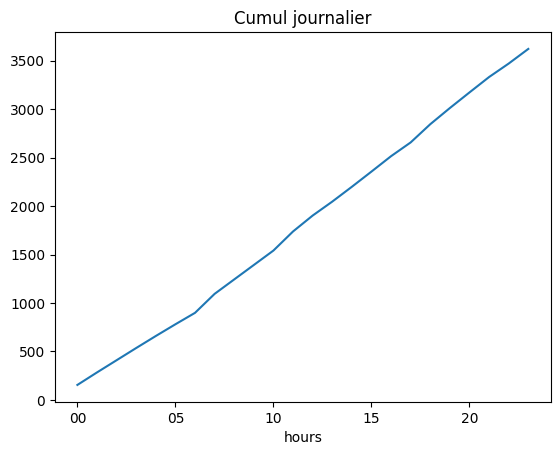

In [1100]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

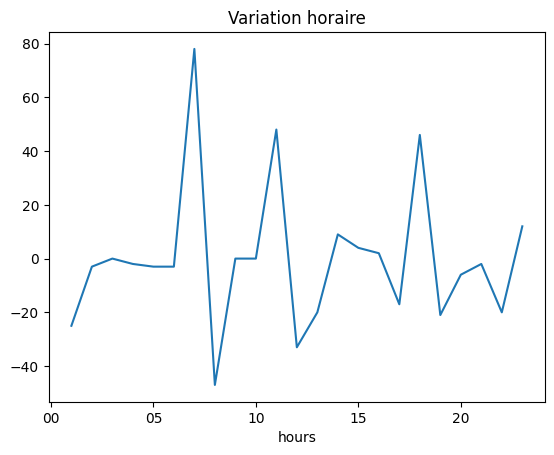

In [1101]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1102]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

467

In [1103]:
df_grp.tail(n)['kWh'].describe()


count    467.000000
mean       3.485895
std        0.703137
min        0.818000
25%        3.346000
50%        3.621000
75%        3.872000
max        5.126000
Name: kWh, dtype: float64

In [1104]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '467 days')

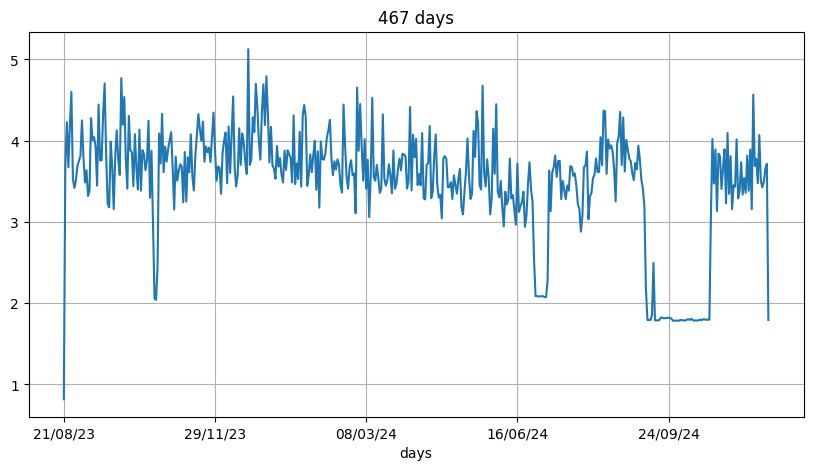

In [1105]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

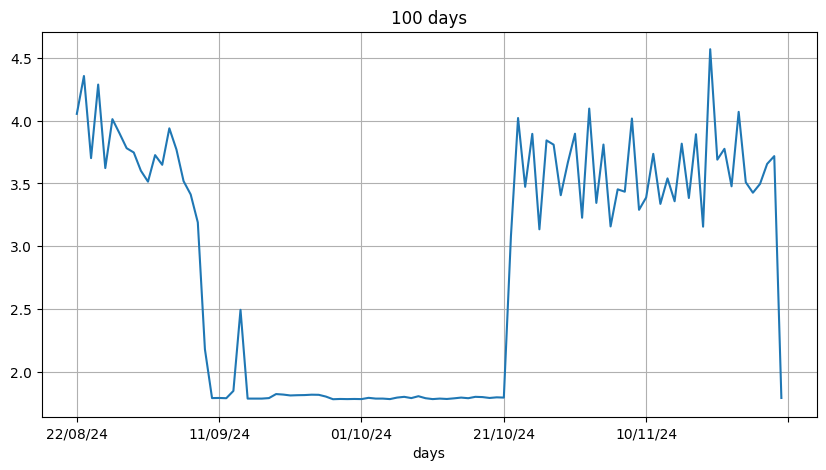

In [1106]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1107]:
df_grp['kWh']

days
21/08/23    0.818
22/08/23    3.700
23/08/23    4.229
24/08/23    3.675
25/08/23    4.189
            ...  
25/11/24    3.426
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    1.794
Name: kWh, Length: 467, dtype: float64

In [1108]:
df_grp.describe()

,kWh
count,467.000000
mean,3.485895
std,0.703137
min,0.818000
25%,3.346000
50%,3.621000
75%,3.872000
max,5.126000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

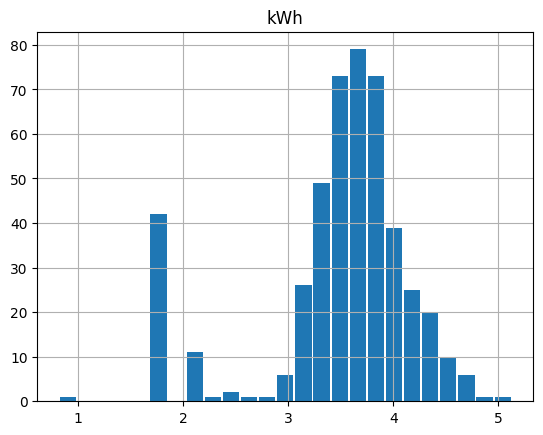

In [1109]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [1110]:
df_grp.tail(span)['kWh']

days
22/08/24    4.053
23/08/24    4.354
24/08/24    3.701
25/08/24    4.286
26/08/24    3.622
            ...  
25/11/24    3.426
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    1.794
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [1111]:
day

'29/11/24'

In [1112]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,145,145,NaN
01,107,252,-38.0
02,110,362,3.0
03,111,473,1.0
04,101,574,-10.0
05,111,685,10.0
06,109,794,-2.0
07,100,894,-9.0
08,110,1004,10.0


In [1113]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


11

In [1114]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 12)

In [1115]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1116]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [1117]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [1118]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [1119]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 00 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     11 non-null     int64  
 1   cumsum  11 non-null     int64  
 2   diff    10 non-null     float64
 3   days    11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes


In [1120]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [1121]:
day

'29/11/24'

In [1122]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,145,145,NaN,1.0
01,107,252,-38.0,2.0
02,110,362,3.0,3.0
03,111,473,1.0,4.0
04,101,574,-10.0,5.0
05,111,685,10.0,6.0
06,109,794,-2.0,7.0
07,100,894,-9.0,8.0
08,110,1004,10.0,9.0


Text(0.5, 1.0, '29/11/24')

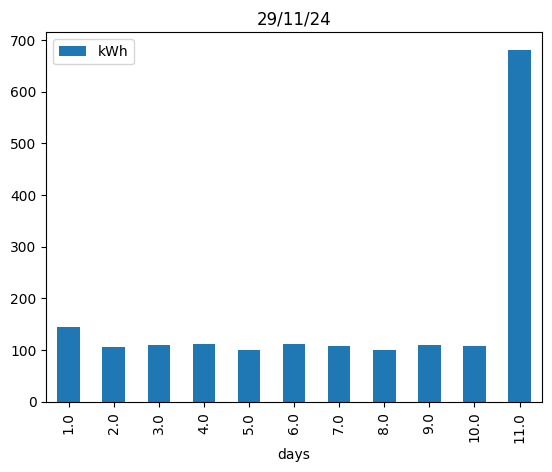

In [1123]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1124]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='hours')

# Conso du jour


In [1125]:
groupedbyhour.count()

,kWh
hours,
00,145
01,107
02,110
03,111
04,101
05,111
06,109
07,100
08,110


In [1126]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    166
01    152
02    170
03    160
04    152
05    141
06    115
07    130
08    131
09    114
10    131
11    115
12    131
13    205
14    139
15    157
16    986
17    211
18    279
19    302
20    312
21    324
22    214
23    189
Name: kWh, dtype: int64

In [1127]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

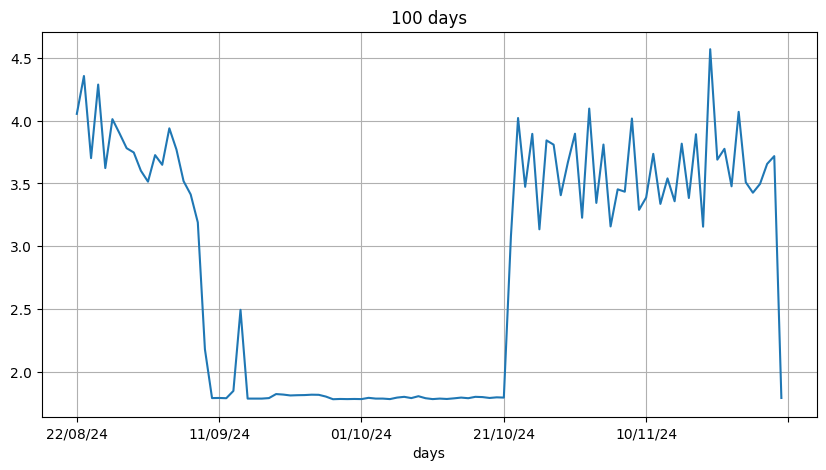

In [1128]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1129]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

88.5342743396759


# Today

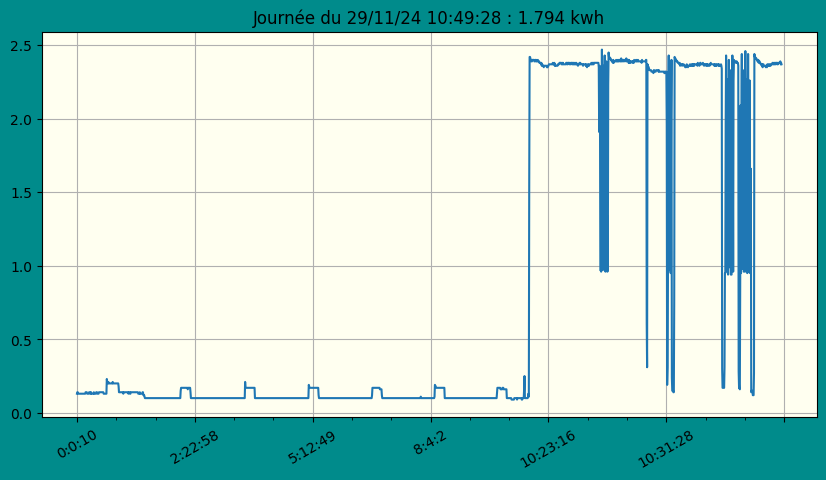

In [1130]:
show(today,bgcolor='ivory')

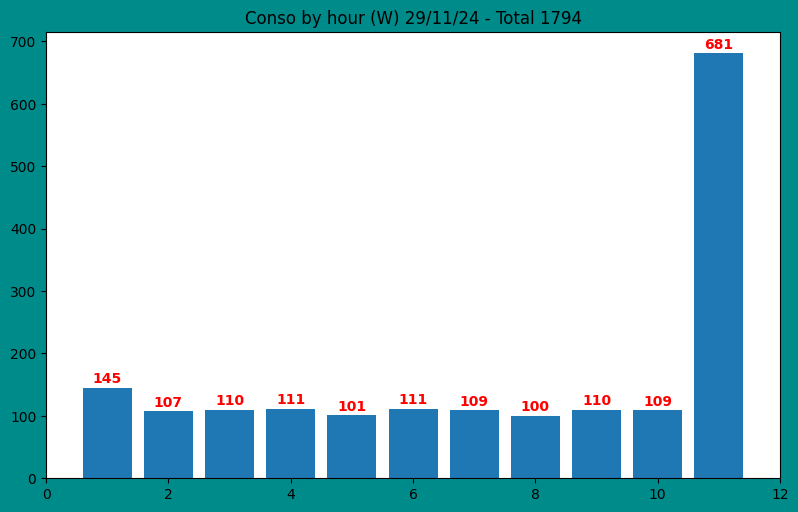

In [1131]:
conso_by_hour(today)

In [1132]:
day = '21/11/24'

('21/11/24', None)

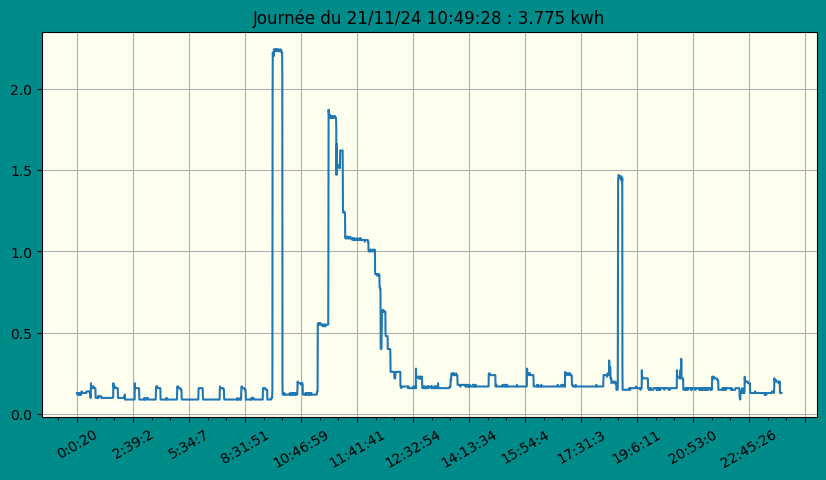

In [1133]:
day, show(day,bgcolor='ivory')

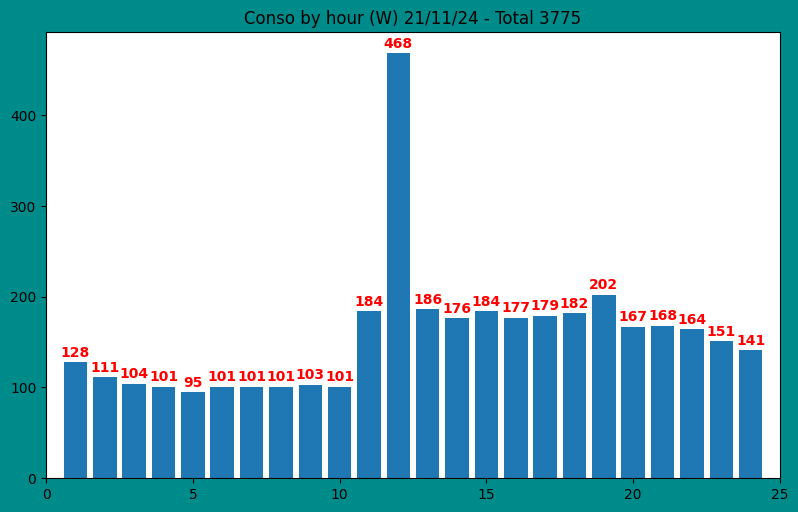

In [1134]:
conso_by_hour(day)

('21/12/23', None)

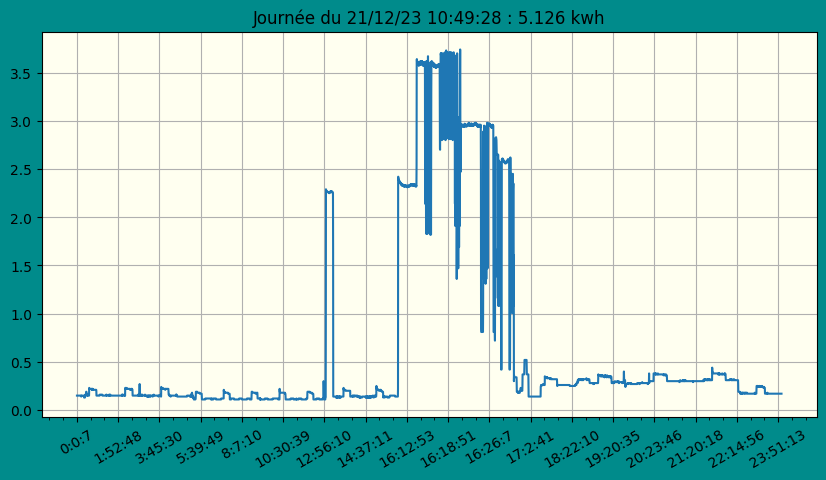

In [1135]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

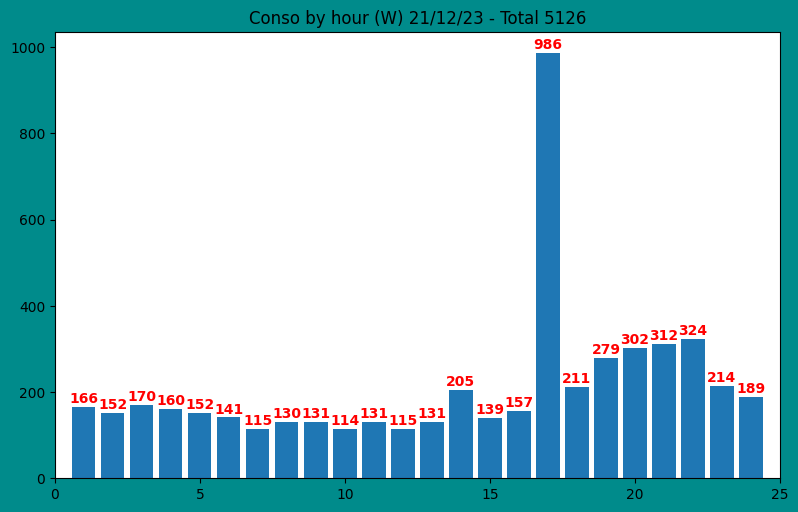

In [1136]:
conso_by_hour(day)

In [1137]:
sum(data)

5126

In [1138]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,145,145,NaN,1.0
01,107,252,-38.0,2.0
02,110,362,3.0,3.0
03,111,473,1.0,4.0
04,101,574,-10.0,5.0
05,111,685,10.0,6.0
06,109,794,-2.0,7.0
07,100,894,-9.0,8.0
08,110,1004,10.0,9.0


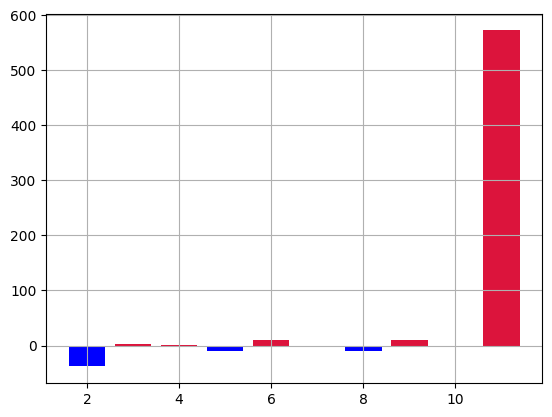

In [1139]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1140]:
data

hours
00    166
01    152
02    170
03    160
04    152
05    141
06    115
07    130
08    131
09    114
10    131
11    115
12    131
13    205
14    139
15    157
16    986
17    211
18    279
19    302
20    312
21    324
22    214
23    189
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

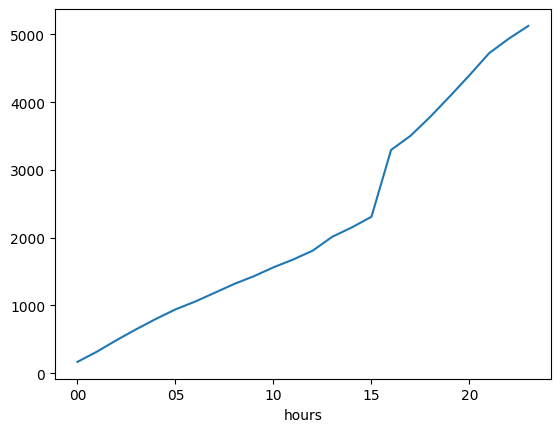

In [1141]:
data.cumsum().plot()


<Axes: xlabel='hours'>

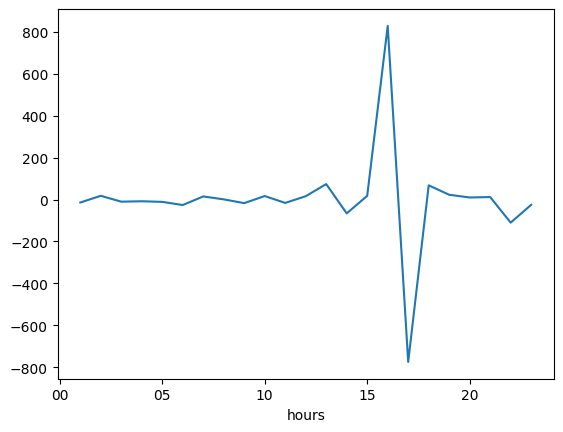

In [1142]:
# evolution par heure
data.diff().plot()

In [1143]:
data.diff().describe()

count     23.000000
mean       1.000000
std      244.848562
min     -775.000000
25%      -16.500000
50%        1.000000
75%       17.500000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

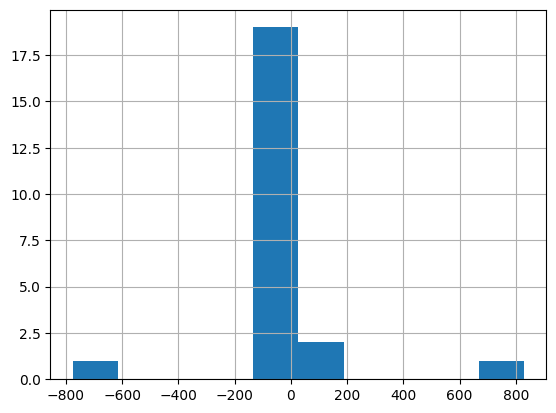

In [1144]:
data.diff().hist()

# Test sauvegarde

In [1145]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [1146]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1147]:
#conso_byhour(day)

In [1148]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


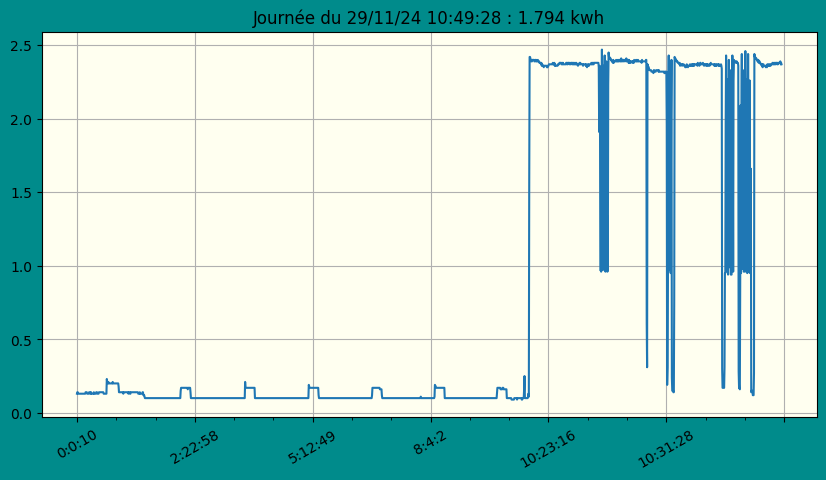

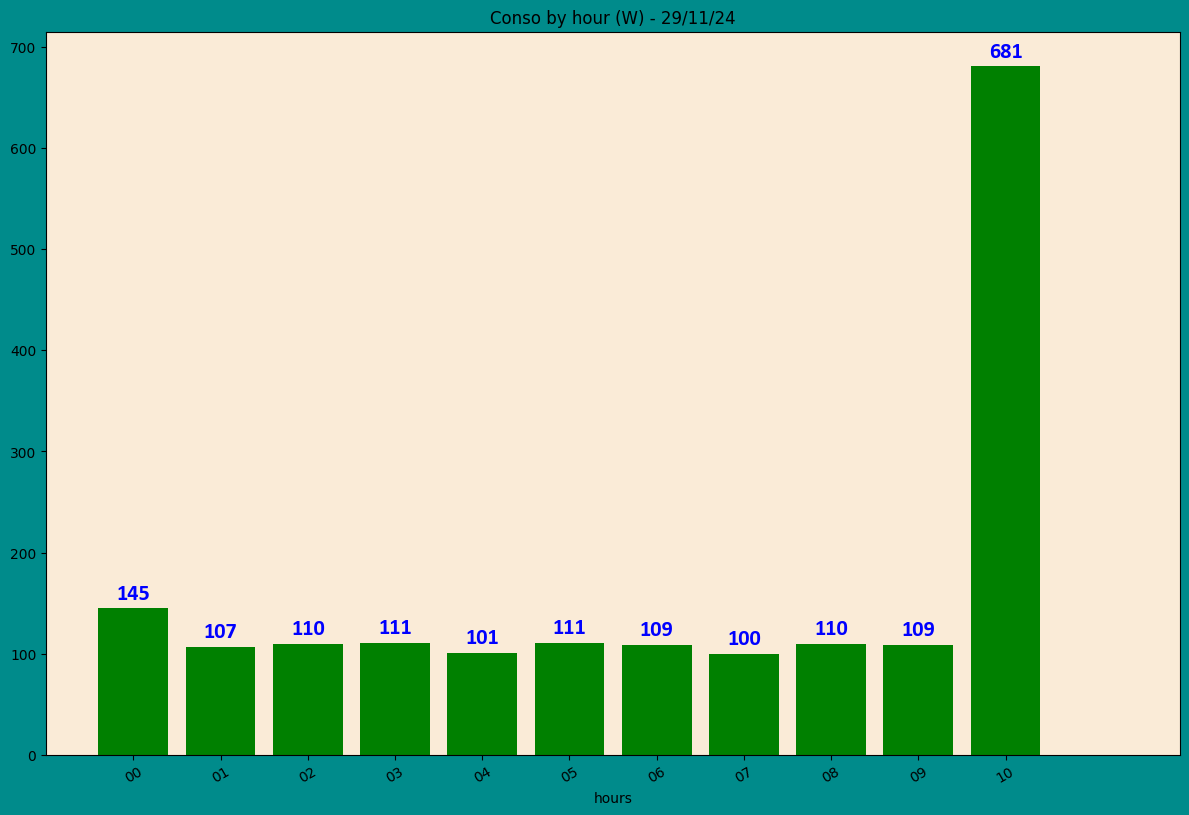

In [1149]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1150]:
month.describe()


count    30.000000
mean      3.612467
std       0.318284
min       3.156000
25%       3.385000
50%       3.524500
75%       3.800500
max       4.567000
Name: kWh, dtype: float64

<Axes: >

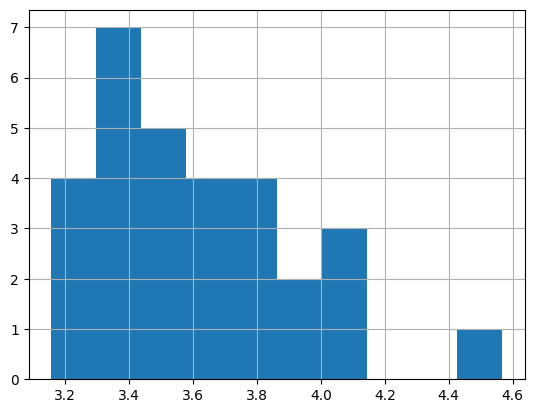

In [1151]:
month.hist()

<Axes: xlabel='days'>

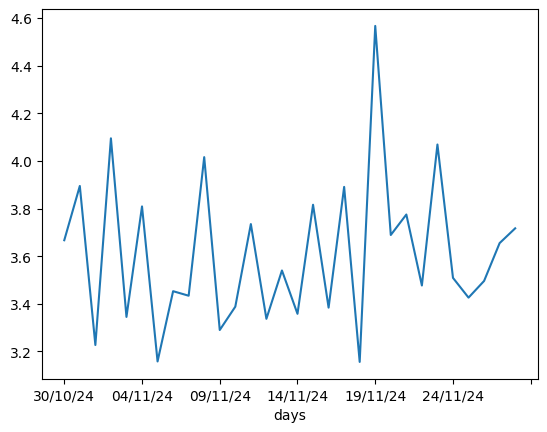

In [1152]:
month.plot()

In [1153]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [1154]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

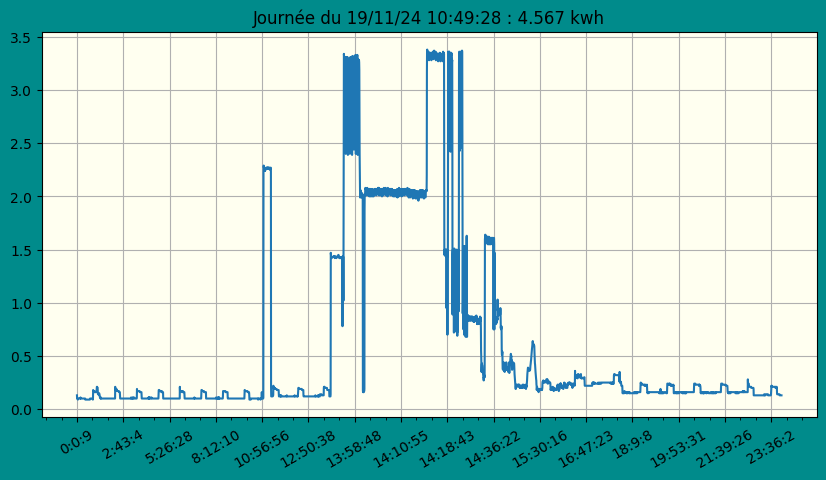

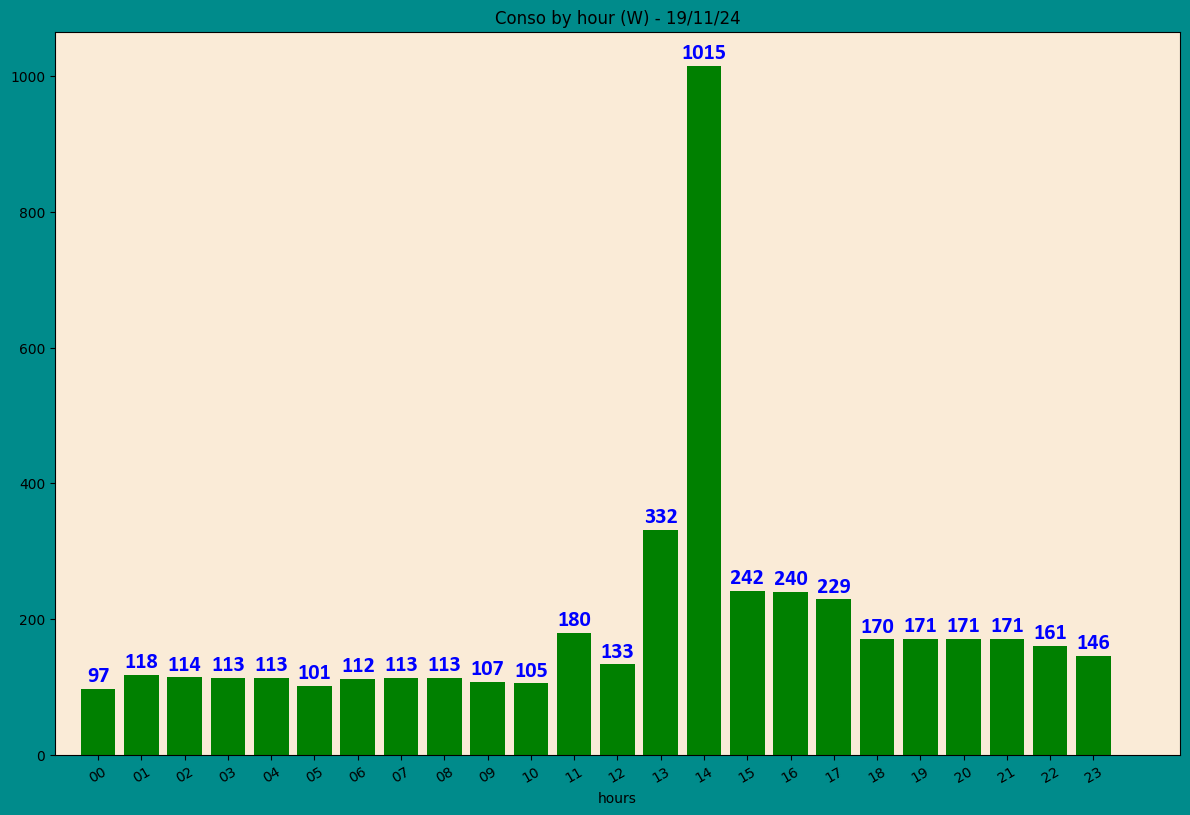

In [1155]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1156]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     140     140    NaN   NaN
         20     287     427  147.0   NaN
         21     131     558 -156.0   NaN
         22     130     688   -1.0   NaN
         23     130     818    0.0   NaN
...             ...     ...    ...   ...
29/11/24 06     109     794   -2.0   7.0
         07     100     894   -9.0   8.0
         08     110    1004   10.0   9.0
         09     109    1113   -1.0  10.0
         10     681    1794  572.0  11.0

[11176 rows x 4 columns]

In [1157]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,97,97,NaN,NaN
01,118,215,21.0,NaN
02,114,329,-4.0,NaN
03,113,442,-1.0,NaN
04,113,555,0.0,NaN
05,101,656,-12.0,NaN
06,112,768,11.0,NaN
07,113,881,1.0,NaN
08,113,994,0.0,NaN


In [1158]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

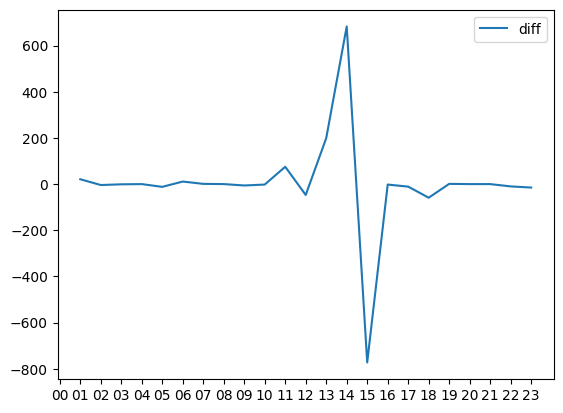

In [1159]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

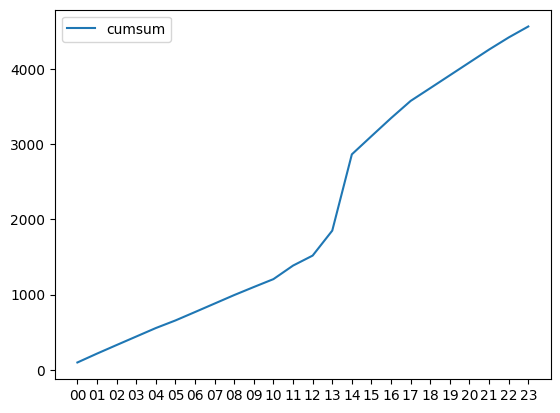

In [1160]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1161]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB